# Alura Challenge Data Science - Semana 2 

## Explorando os dados: vendo as informações por uma outra perspectiva

In [1]:
# Importando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Importando base de dados e exibindo seus primeiros registros

data = pd.read_csv('dataset/Telco-Customer-Churn-Tratado.csv')
data.head()

,ClienteId,ClienteCancelado,Gênero,Idoso,Parceiro,Dependentes,TempoContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaSemPapel,FormaPagamento,ContasDiarias,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


## Analisar a variável target: Churn (ClienteCancelado)

In [3]:
frequencia = data.ClienteCancelado.value_counts()

In [4]:
percentual = round(data.ClienteCancelado.value_counts(normalize=True) * 100, 2)

In [5]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)' : percentual})
dist_freq.rename_axis('Cancelado', axis = 'columns', inplace=True)
dist_freq

Cancelado,Frequência,Porcentagem (%)
No,5174,73.46
Yes,1869,26.54


## Gráficos relevantes para a variável target(ClienteCancelado)

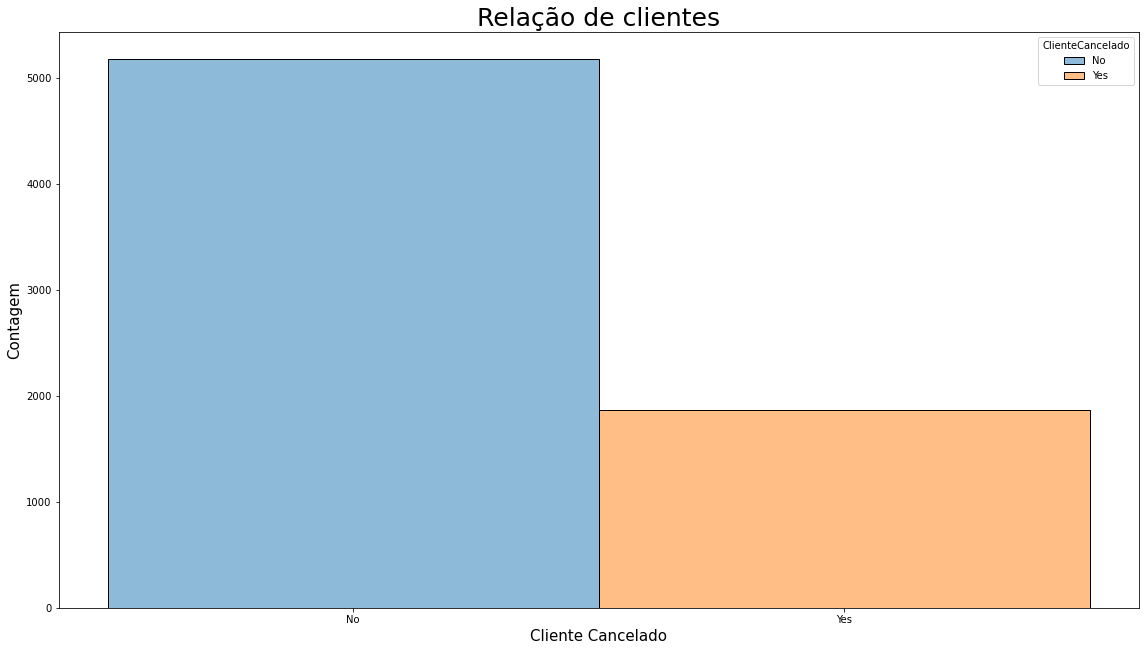

In [6]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax = sns.histplot(data = data, x = 'ClienteCancelado', hue = 'ClienteCancelado')
ax.set_title('Relação de clientes', fontsize = 25)
ax.set_xlabel('Cliente Cancelado', fontsize = 15)
ax.set_ylabel('Contagem', fontsize = 15)
plt.show()

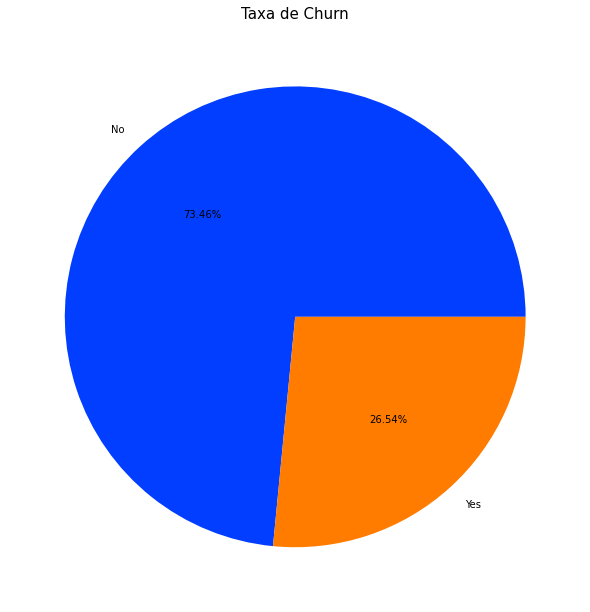

In [7]:
label = ['No', 'Yes']
colors = sns.color_palette('bright')

fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax.pie(data.ClienteCancelado.value_counts(), autopct = '%.2f%%', labels = label, colors = colors)
ax.set_title('Taxa de Churn', fontsize = 15, pad = 10)

plt.show()

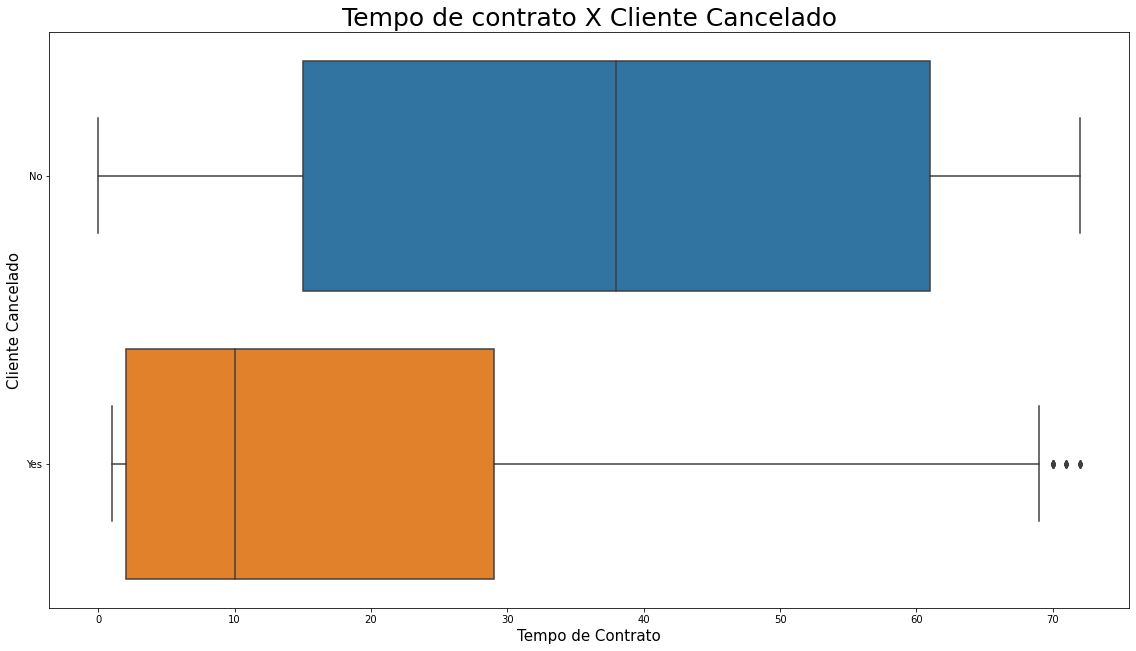

In [11]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])
ax = sns.boxplot(x = 'TempoContrato', y = 'ClienteCancelado', data = data)
ax.set_title('Tempo de contrato X Cliente Cancelado', fontsize = 25)
ax.set_xlabel('Tempo de Contrato', fontsize = 15)
ax.set_ylabel('Cliente Cancelado', fontsize = 15)
plt.show()

Podemos perceber que a taxa de cancelamento de cliente se faz na maioria dos casos nos primeiros meses de contrato

**Tempo de Contrato médio**

In [23]:
cliente_cancelado = round(data.query('ClienteCancelado == "Yes"').TempoContrato.mean())

print(f'O tempo médio de contrato de um cliente que se evadiu é {cliente_cancelado} meses')

O tempo médio de contrato de um cliente que se evadiu é 18 meses


In [25]:
cliente_ativo = round(data.query('ClienteCancelado == "No"').TempoContrato.mean())

print(f'O tempo médio de contrato de um cliente ativo é {cliente_ativo} meses')

O tempo médio de contrato de um cliente ativo é 38 meses


**Comparação da variável target com outras categóricas do dataset**

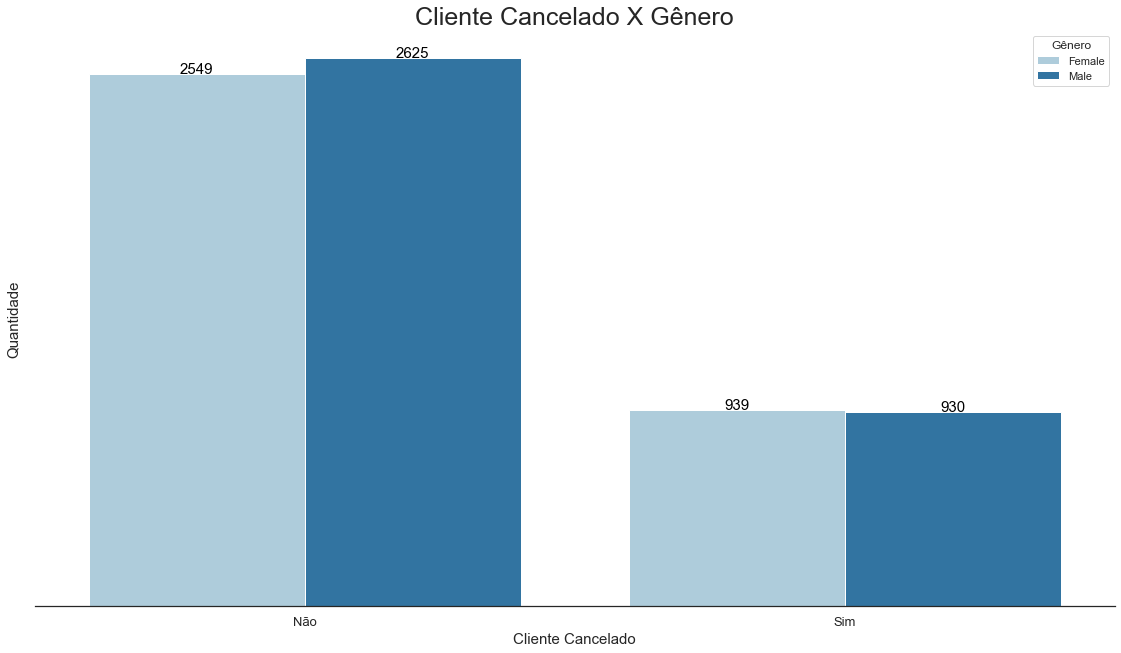

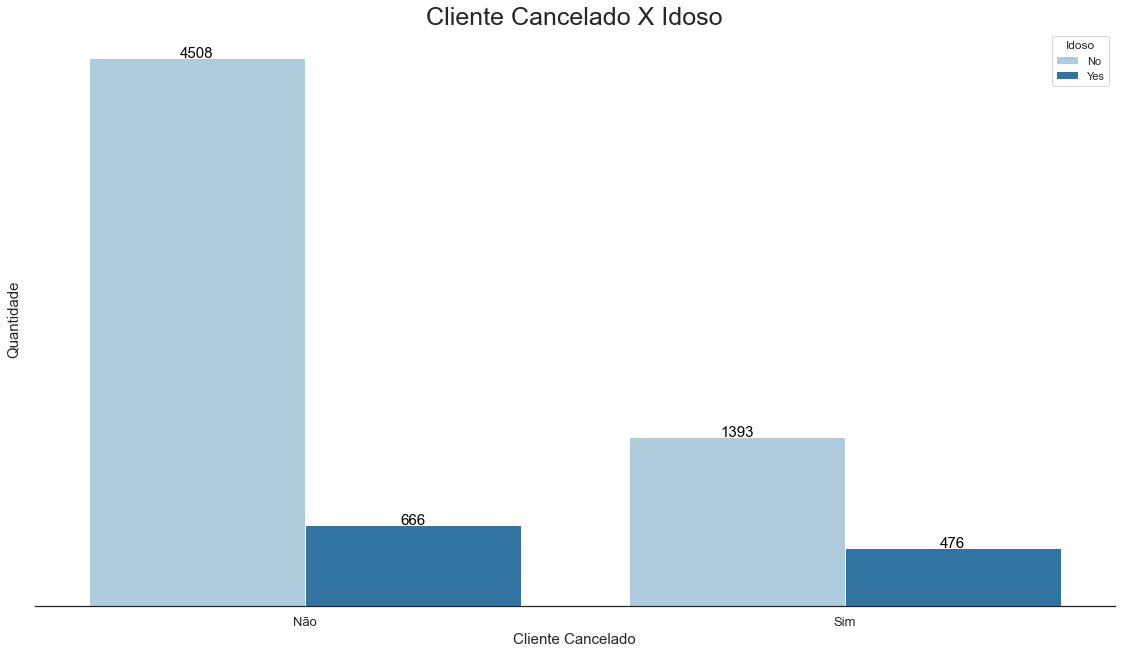

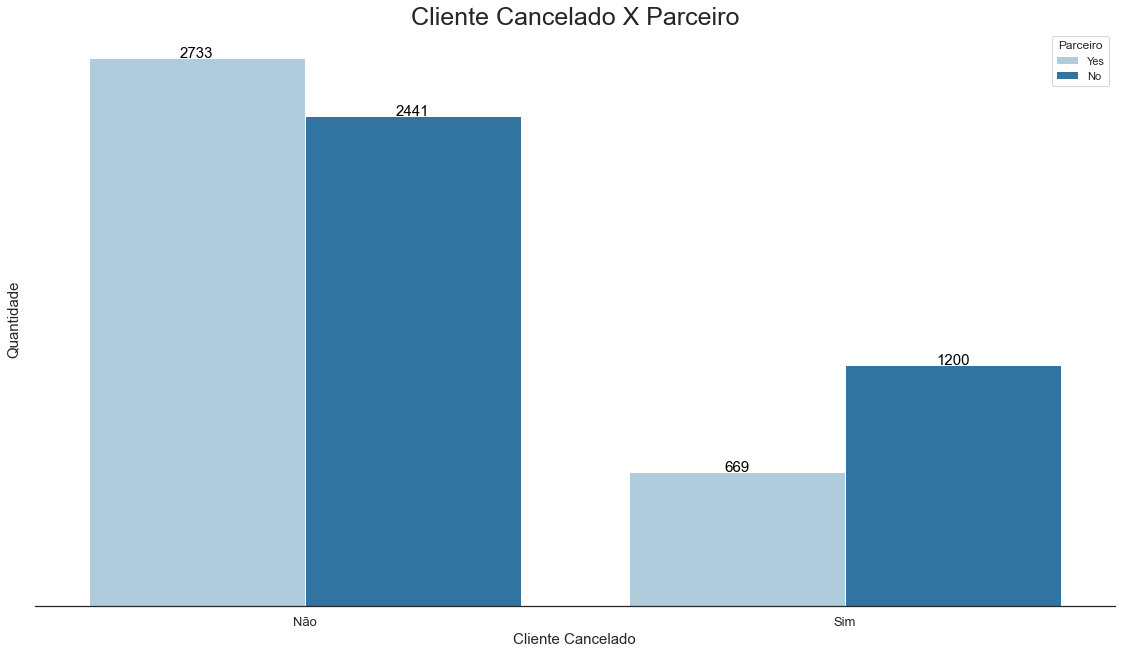

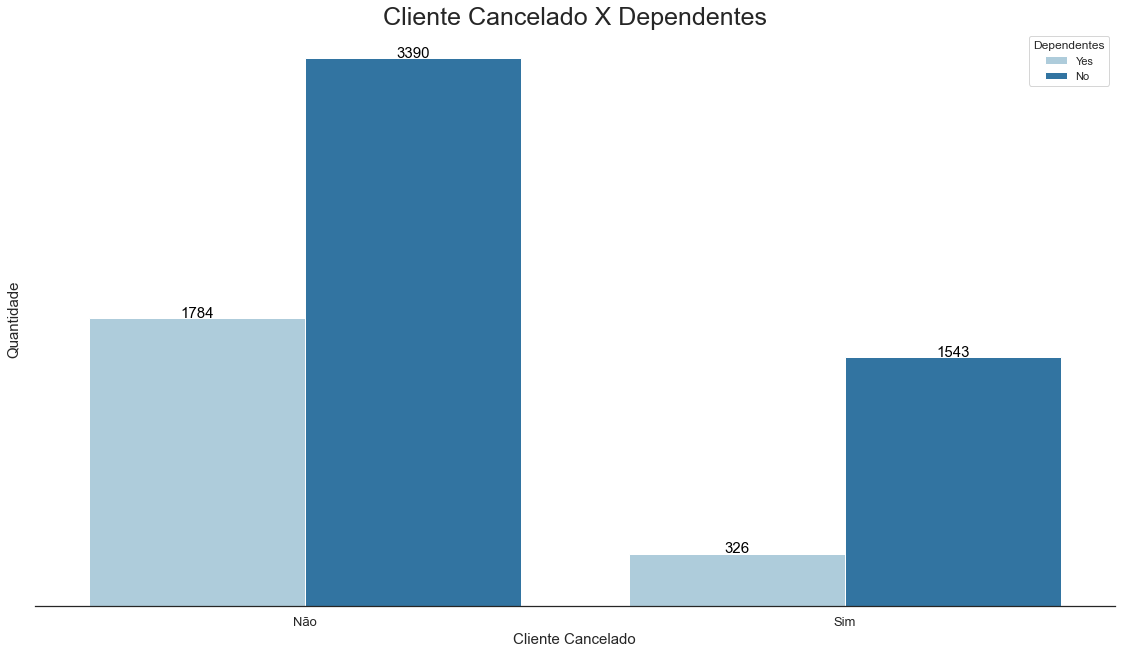

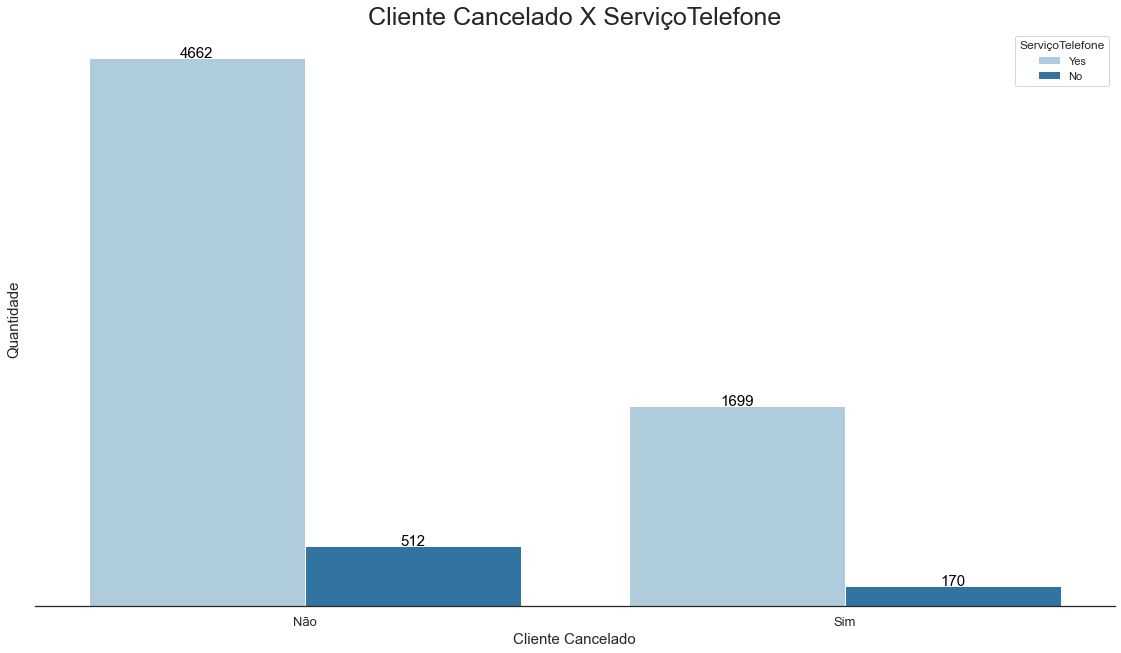

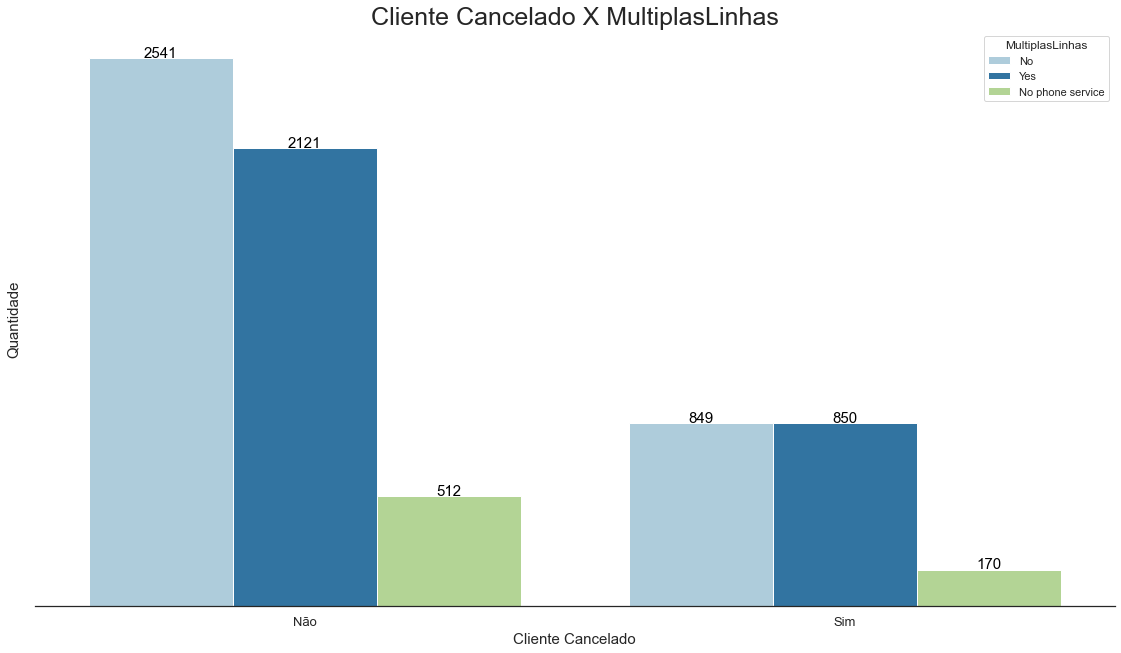

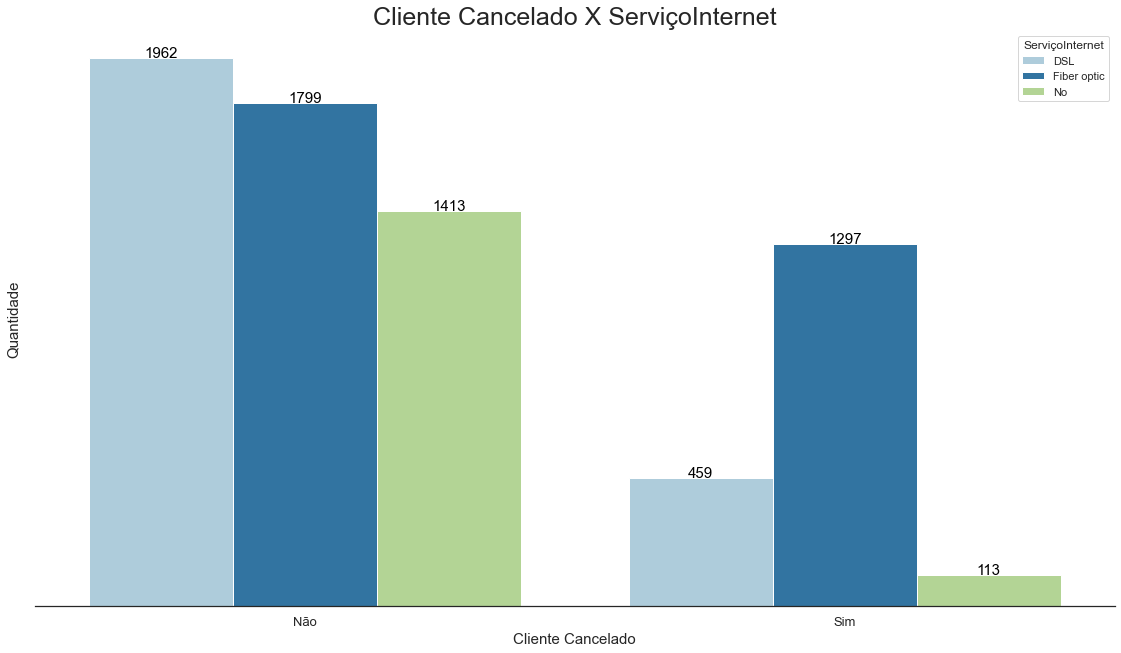

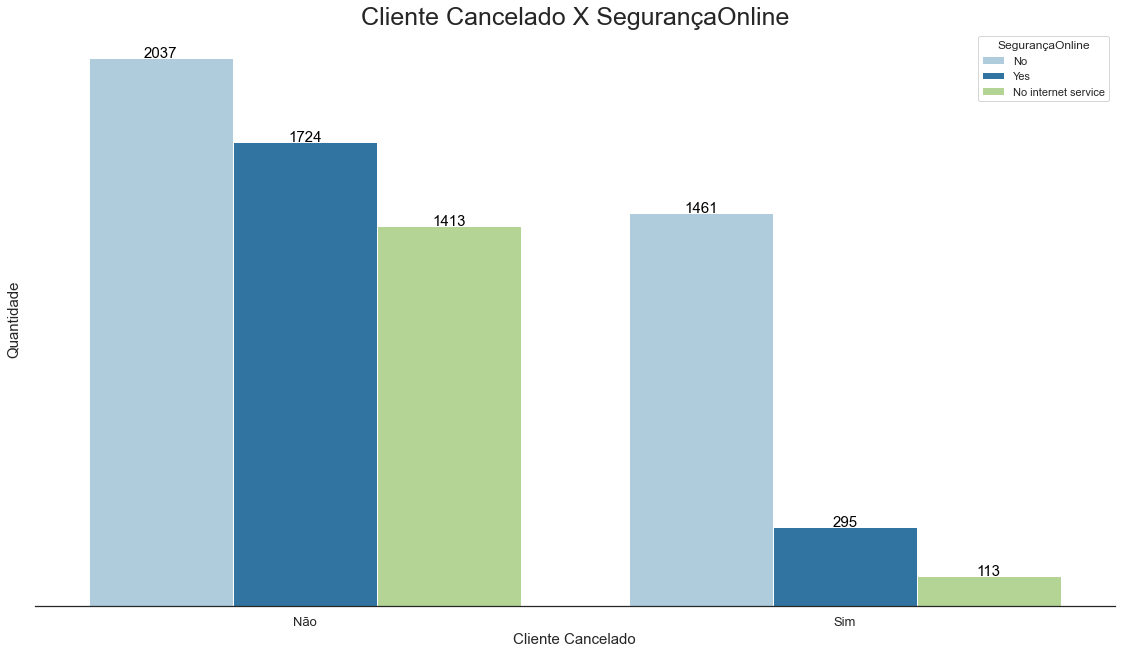

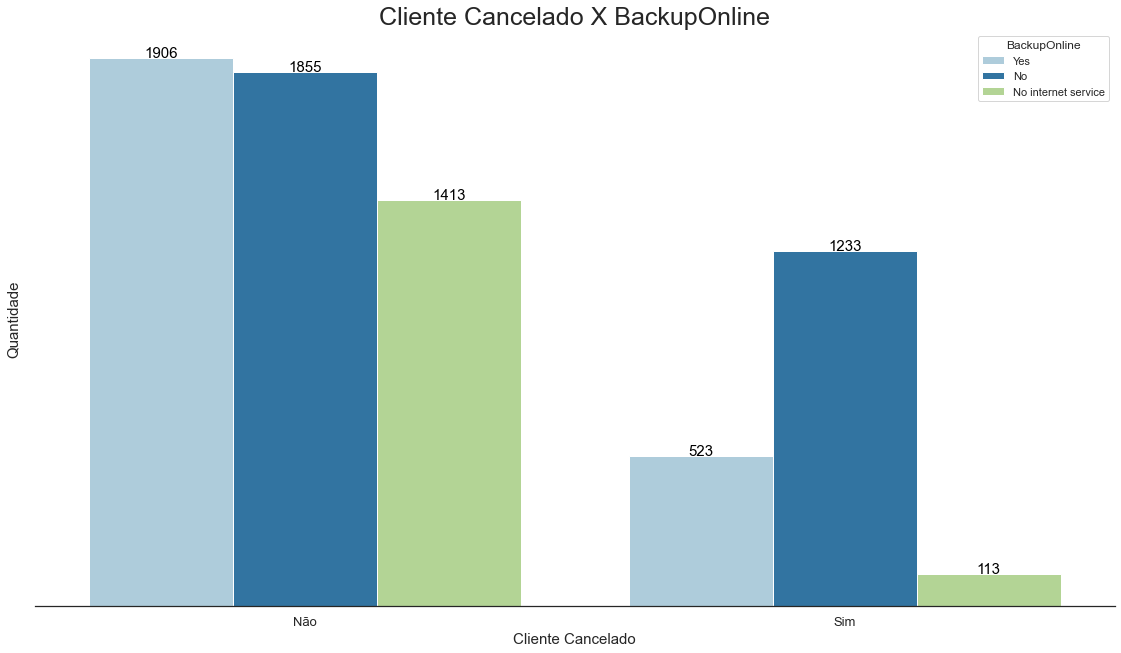

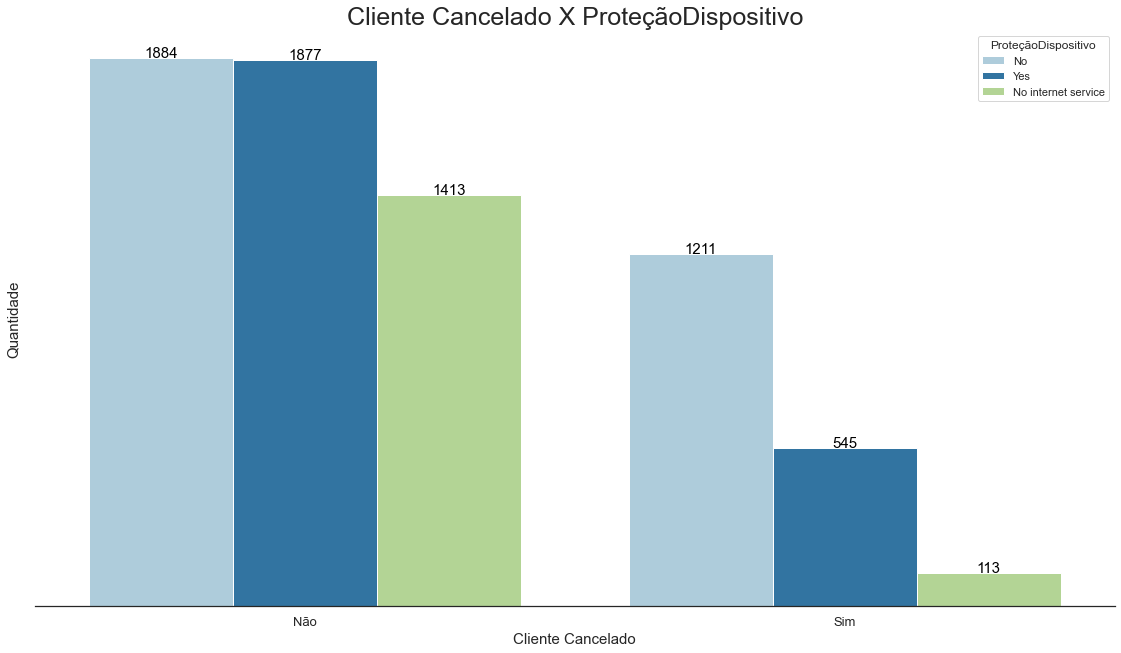

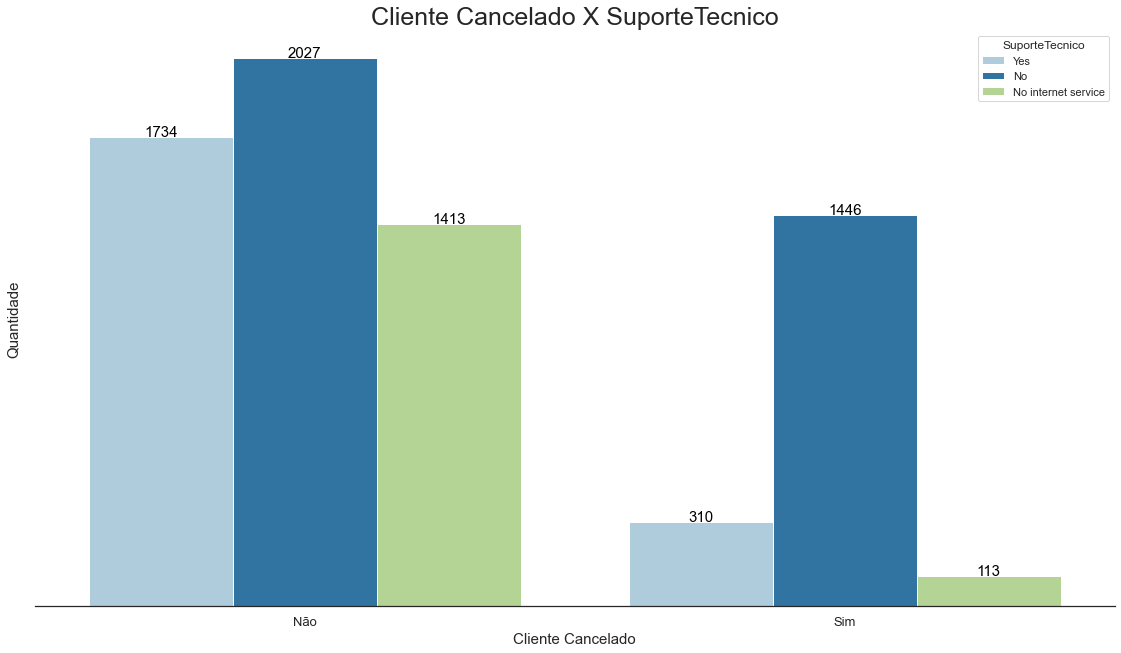

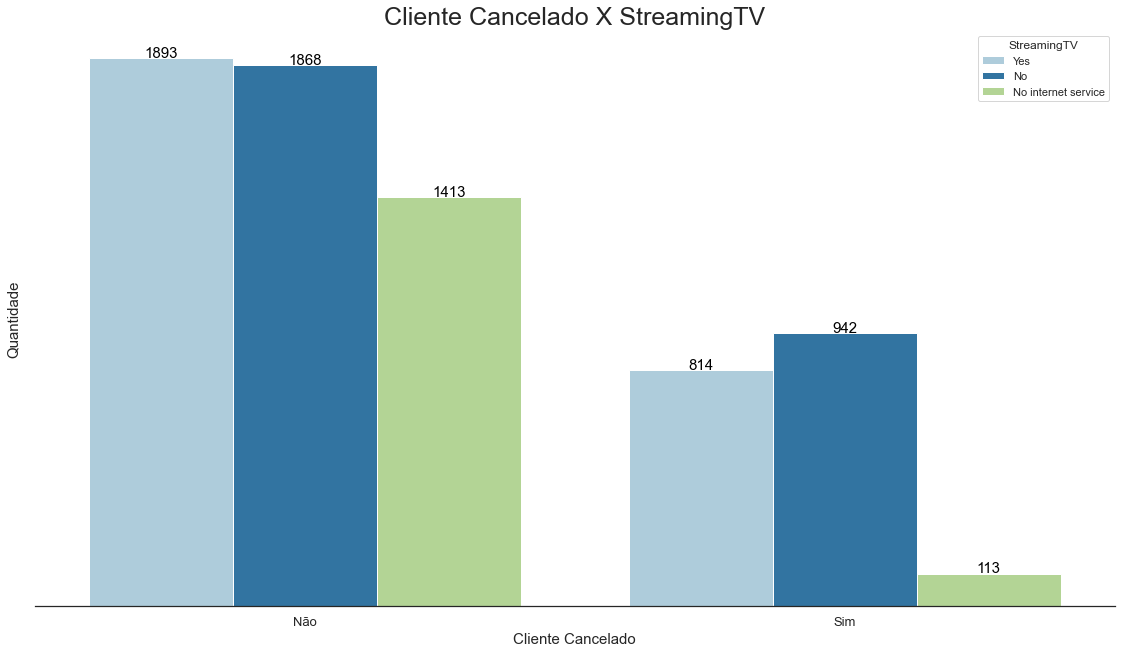

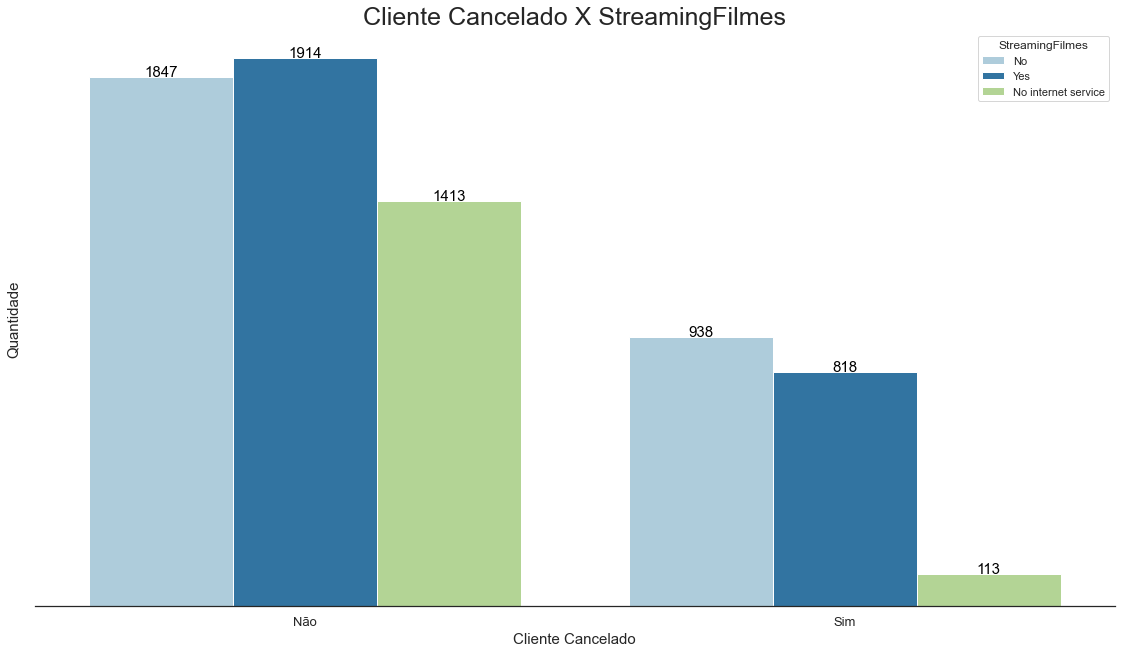

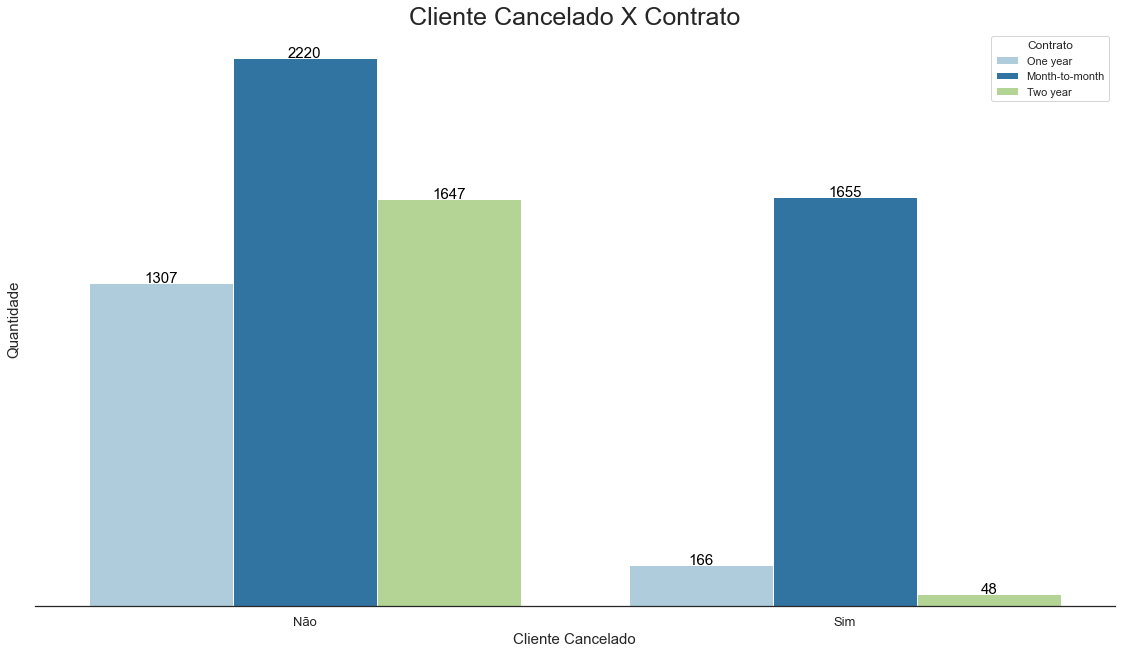

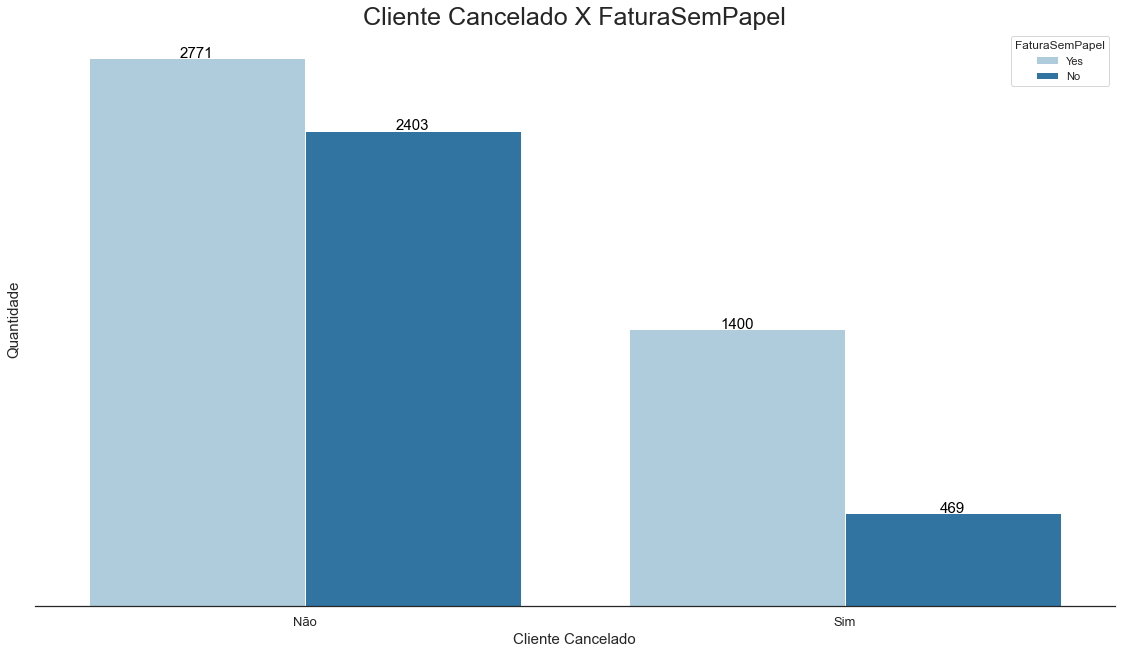

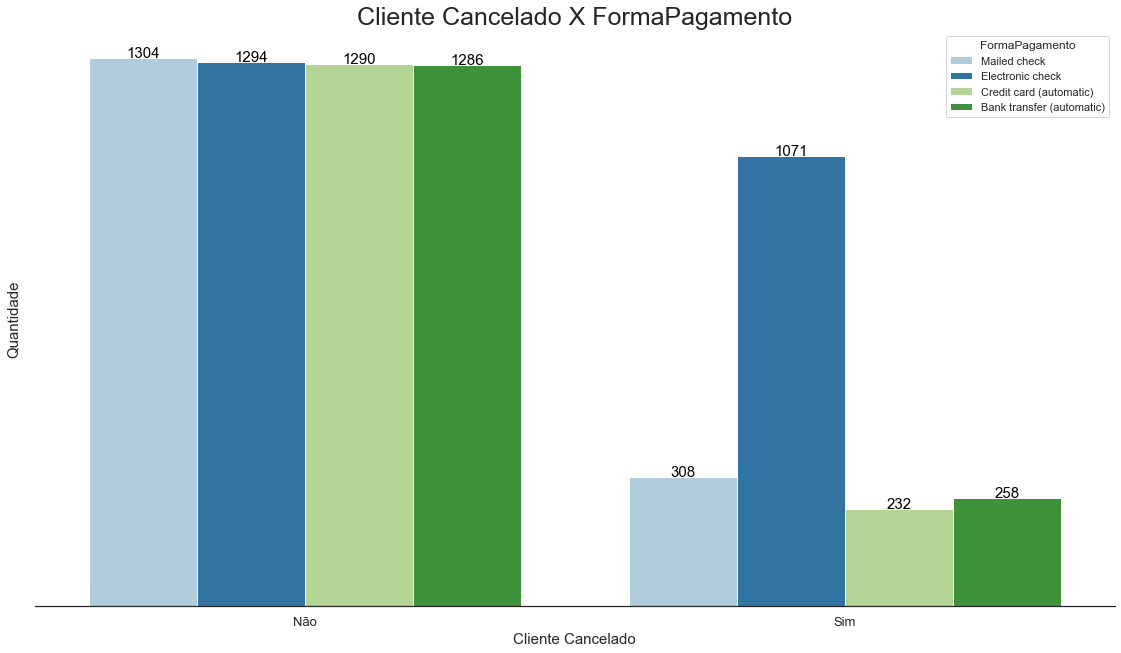

In [113]:
categorias = ['Gênero', 'Idoso', 'Parceiro', 'Dependentes', 'ServiçoTelefone', 'MultiplasLinhas',
              'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
              'ProteçãoDispositivo', 'SuporteTecnico', 'StreamingTV',
              'StreamingFilmes', 'Contrato', 'FaturaSemPapel', 'FormaPagamento']

for cat in categorias:
    custom_params = {"axes.spines.right": False,"axes.spines.left": False, "axes.spines.top": False}
    sns.set_theme(context="notebook", style="white", rc=custom_params)
    fig = plt.figure(figsize=(15, 8))
    ax = fig.add_axes([0,0,1,1])
    ax = sns.countplot(data = data, x = 'ClienteCancelado', hue = cat, palette = 'Paired')
    ax.set_title(f'Cliente Cancelado X {cat}', fontsize = 25)
    ax.set_xlabel('Cliente Cancelado', fontsize = 15)
    ax.set_ylabel('Quantidade', fontsize = 15)
    ax.set_yticklabels([])
    ax.set_xticklabels(['Não', 'Sim'], fontsize = 13)
    for i in ax.patches:
        ax.annotate(i.get_height(),
            (i.get_x() + i.get_width() / 2, i.get_height()),
            ha='center',
            va='baseline',
            fontsize=15,
            color='black',
            xytext=(0, 1),
            textcoords='offset points')
    plt.show()
 
    

**Com os gráficos podemos perceber que:**

Grande parte dos clientes que evadem não são considerados idosos;

Não possuem parceiro ou não possuem dependentes;

Possuem serviço telefônico;

Utilizam serviço de internet de Fibra Ótica;

Não possuem serviços de segurança online, backup online, proteção de dispositivo e suporte técnico;

Não utilizam serviço de streaming de tv ou de filmes;

O tipo de contrato é o mensal, a fatura é digital, e a forma de pagamento é o cheque eletrônico.

## Análise da correlação das variáveis

In [111]:
# Copia do data frame para realização da analise de correlação

data_copia = data.copy()
data_copia.head()

,ClienteId,ClienteCancelado,Gênero,Idoso,Parceiro,Dependentes,TempoContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaSemPapel,FormaPagamento,ContasDiarias,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [119]:
#Conversão das variaveis do data frame para categoricas

categoria = ['ClienteCancelado','Gênero', 'Idoso', 'Parceiro', 'Dependentes', 'ServiçoTelefone', 'MultiplasLinhas',
              'ServiçoInternet', 'SegurançaOnline', 'BackupOnline',
              'ProteçãoDispositivo', 'SuporteTecnico', 'StreamingTV',
              'StreamingFilmes', 'Contrato', 'FaturaSemPapel', 'FormaPagamento']

for i in categoria:
    data_copia[i] = data_copia[i].astype('category')
data_copia.dtypes    

ClienteId                object
ClienteCancelado       category
Gênero                 category
Idoso                  category
Parceiro               category
Dependentes            category
TempoContrato             int64
ServiçoTelefone        category
MultiplasLinhas        category
ServiçoInternet        category
SegurançaOnline        category
BackupOnline           category
ProteçãoDispositivo    category
SuporteTecnico         category
StreamingTV            category
StreamingFilmes        category
Contrato               category
FaturaSemPapel         category
FormaPagamento         category
ContasDiarias           float64
CobrançaMensal          float64
CobrançaTotal           float64
dtype: object

In [120]:
#Conversão para inteiros

for i in categoria:
    data_copia[i] = data_copia[i].cat.codes
data_copia.dtypes

ClienteId               object
ClienteCancelado          int8
Gênero                    int8
Idoso                     int8
Parceiro                  int8
Dependentes               int8
TempoContrato            int64
ServiçoTelefone           int8
MultiplasLinhas           int8
ServiçoInternet           int8
SegurançaOnline           int8
BackupOnline              int8
ProteçãoDispositivo       int8
SuporteTecnico            int8
StreamingTV               int8
StreamingFilmes           int8
Contrato                  int8
FaturaSemPapel            int8
FormaPagamento            int8
ContasDiarias          float64
CobrançaMensal         float64
CobrançaTotal          float64
dtype: object

In [121]:
data_copia.head()

,ClienteId,ClienteCancelado,Gênero,Idoso,Parceiro,Dependentes,TempoContrato,ServiçoTelefone,MultiplasLinhas,ServiçoInternet,...,ProteçãoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,Contrato,FaturaSemPapel,FormaPagamento,ContasDiarias,CobrançaMensal,CobrançaTotal
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,0,2,2,0,1,1,3,2.19,65.6,593.30
1,0003-MKNFE,0,1,0,0,0,9,1,2,0,...,0,0,0,2,0,0,3,2.00,59.9,542.40
2,0004-TLHLJ,1,1,0,0,0,4,1,0,1,...,2,0,0,0,0,1,2,2.46,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,1,...,2,0,2,2,0,1,2,3.27,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,1,...,0,2,2,0,0,1,3,2.80,83.9,267.40


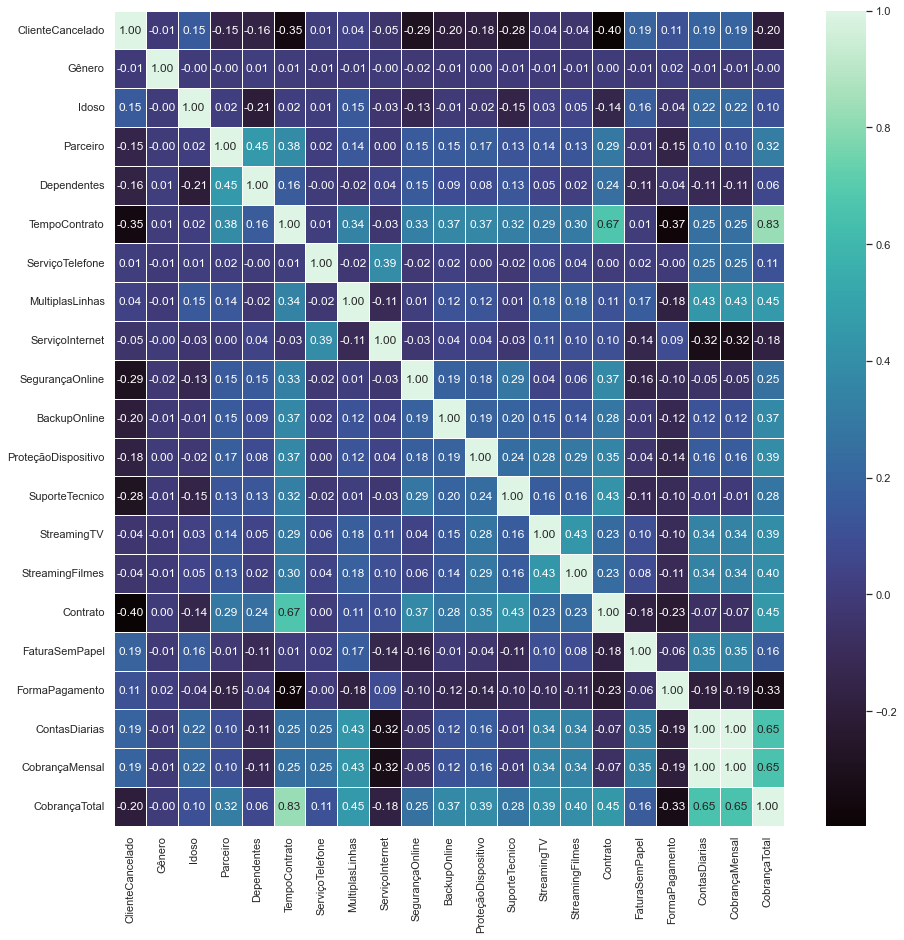

In [127]:
# Plotando o heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data_copia.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = 'mako')
plt.show()